In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
df=pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [2]:
df.shape

(145460, 23)

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

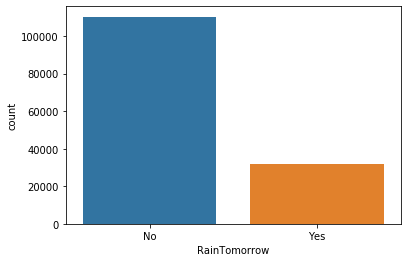

In [3]:
sns.countplot(df['RainTomorrow'])
df['RainTomorrow'].value_counts()

In [4]:
features_na=[features for features in df.columns if df[features].isnull().sum()>1]
for features in features_na:
    print(f'{features} {np.round(df[features].isnull().mean(),4)} % missing values')

MinTemp 0.0102 % missing values
MaxTemp 0.0087 % missing values
Rainfall 0.0224 % missing values
Evaporation 0.4317 % missing values
Sunshine 0.4801 % missing values
WindGustDir 0.071 % missing values
WindGustSpeed 0.0706 % missing values
WindDir9am 0.0726 % missing values
WindDir3pm 0.0291 % missing values
WindSpeed9am 0.0121 % missing values
WindSpeed3pm 0.0211 % missing values
Humidity9am 0.0182 % missing values
Humidity3pm 0.031 % missing values
Pressure9am 0.1036 % missing values
Pressure3pm 0.1033 % missing values
Cloud9am 0.3842 % missing values
Cloud3pm 0.4081 % missing values
Temp9am 0.0121 % missing values
Temp3pm 0.0248 % missing values
RainToday 0.0224 % missing values
RainTomorrow 0.0225 % missing values


In [5]:
df.dropna(subset=['RainTomorrow'], how='all', inplace=True)

In [6]:
df.dropna(subset=['RainToday'], how='all', inplace=True)

In [7]:
df['RainTomorrow'].unique()
mapper={'Yes':1,'No':0}
df['RainTomorrow']=df['RainTomorrow'].map(mapper)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0


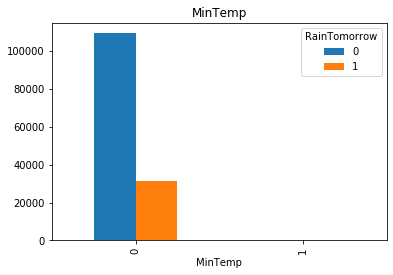

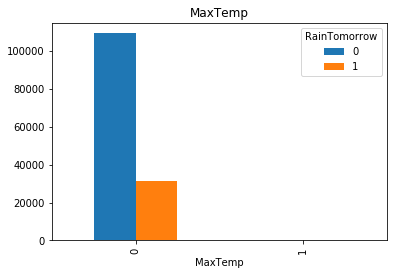

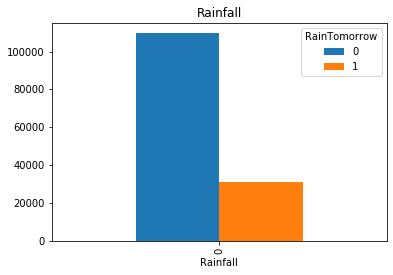

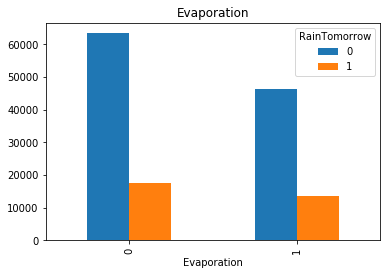

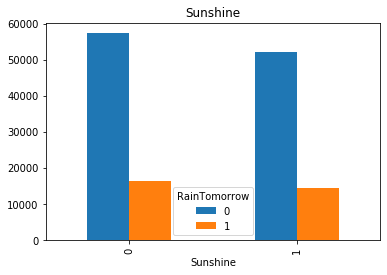

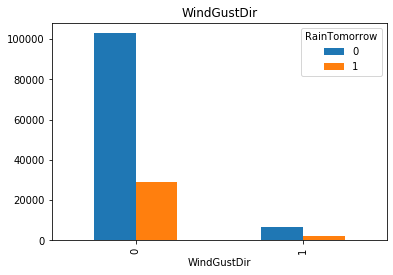

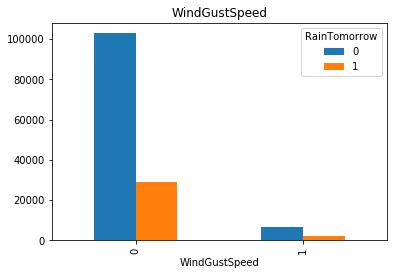

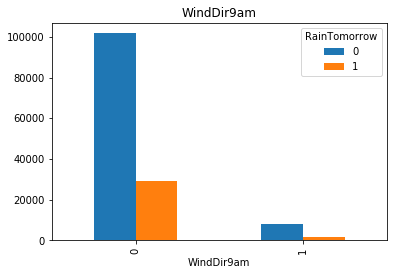

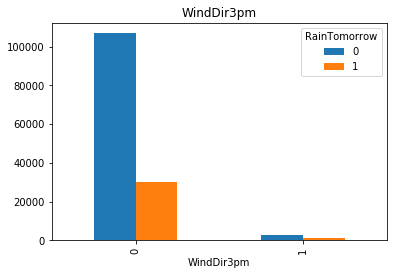

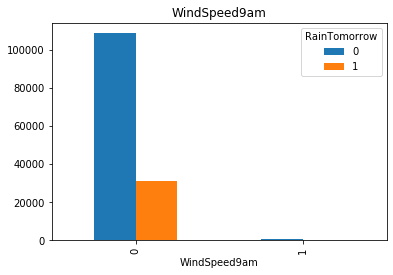

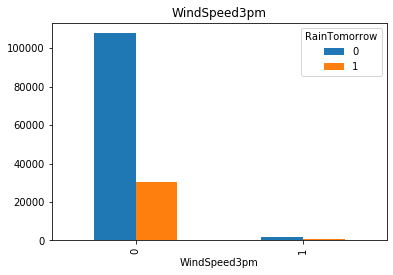

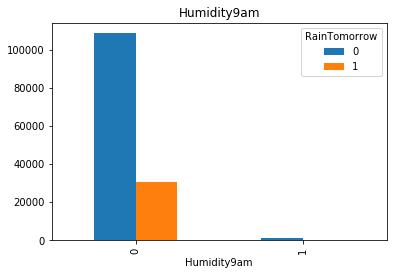

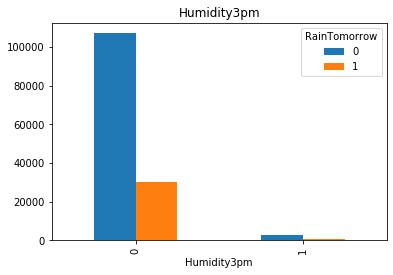

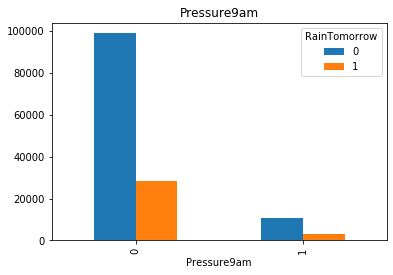

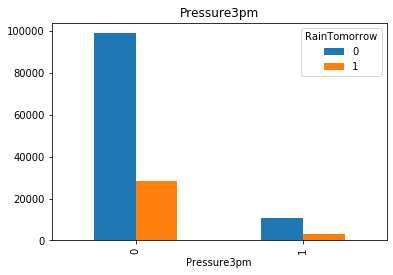

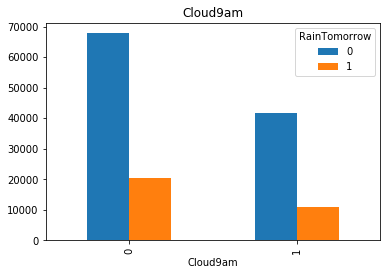

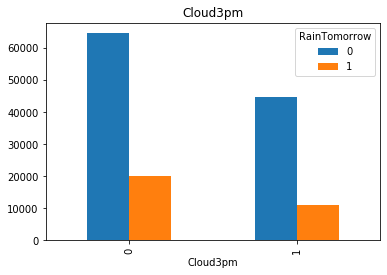

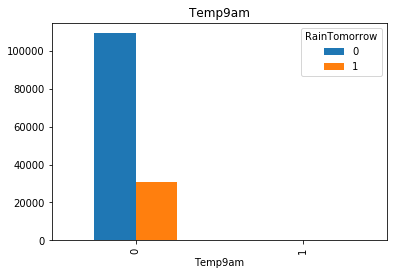

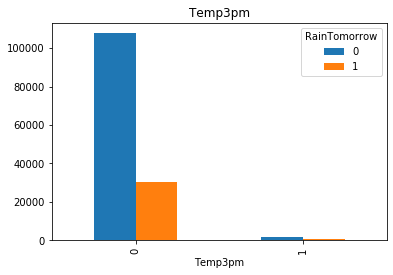

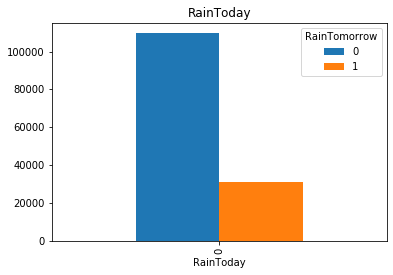

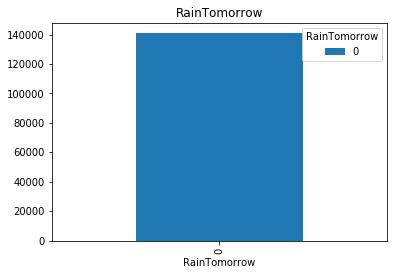

In [8]:
for features in features_na:
    data=df.copy()
    data[features]=np.where(data[features].isnull(),1,0)
    pd.crosstab(data[features],data['RainTomorrow']).plot.bar()
    plt.title(features)
    plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null

In [10]:
df['Day']=pd.to_datetime(df['Date'],format="%Y/%m/%d").dt.day
df['Month']=pd.to_datetime(df['Date'],format="%Y/%m/%d").dt.month
df['Year']=pd.to_datetime(df['Date'],format="%Y/%m/%d").dt.year
df=df.drop(['Date'],axis=1)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,0,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,0,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,0,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,0,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,0,5,12,2008


In [11]:
features_na=[features for features in df.columns if df[features].isnull().sum()>1]
for features in features_na:
    print(f'{features} {np.round(df[features].isnull().mean(),4)} % missing values')

MinTemp 0.0033 % missing values
MaxTemp 0.0022 % missing values
Evaporation 0.424 % missing values
Sunshine 0.4745 % missing values
WindGustDir 0.0651 % missing values
WindGustSpeed 0.0647 % missing values
WindDir9am 0.0686 % missing values
WindDir3pm 0.0261 % missing values
WindSpeed9am 0.0075 % missing values
WindSpeed3pm 0.018 % missing values
Humidity9am 0.0108 % missing values
Humidity3pm 0.0249 % missing values
Pressure9am 0.0976 % missing values
Pressure3pm 0.0978 % missing values
Cloud9am 0.3738 % missing values
Cloud3pm 0.3984 % missing values
Temp9am 0.0047 % missing values
Temp3pm 0.0186 % missing values


In [12]:
features_na_mean=[features for features in features_na if features not in ['Evaporation']+['Sunshine']+['Cloud9am']+['Cloud3pm']]
features_na_mean

['MinTemp',
 'MaxTemp',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [13]:
mean1=np.mean(df['MinTemp'])
df['MinTemp']=df['MinTemp'].fillna(mean1)
mean2=np.mean(df['MaxTemp'])
df['MaxTemp']=df['MaxTemp'].fillna(mean2)
mean3=np.mean(df['Rainfall'])
df['Rainfall']=df['Rainfall'].fillna(mean3)
mean4=np.mean(df['WindGustSpeed'])
df['WindGustSpeed']=df['WindGustSpeed'].fillna(mean4)
mean5=np.mean(df['WindSpeed9am'])
df['WindSpeed9am']=df['WindSpeed9am'].fillna(mean5)
mean6=np.mean(df['WindSpeed3pm'])
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(mean6)
mean7=np.mean(df['Humidity9am'])
df['Humidity9am']=df['Humidity9am'].fillna(mean7)
mean8=np.mean(df['Humidity3pm'])
df['Humidity3pm']=df['Humidity3pm'].fillna(mean8)
mean9=np.mean(df['Pressure9am'])
df['Pressure9am']=df['Pressure9am'].fillna(mean9)
mean10=np.mean(df['Pressure3pm'])
df['Pressure3pm']=df['Pressure3pm'].fillna(mean10)
mean11=np.mean(df['Temp9am'])
df['Temp9am']=df['Temp9am'].fillna(mean11)
mean12=np.mean(df['Temp3pm'])
df['Temp3pm']=df['Temp3pm'].fillna(mean12)

In [14]:
features_na=[features for features in df.columns if df[features].isnull().sum()>1]
for features in features_na:
    print(f'{features} {np.round(df[features].isnull().mean(),4)} % missing values')

Evaporation 0.424 % missing values
Sunshine 0.4745 % missing values
WindGustDir 0.0651 % missing values
WindDir9am 0.0686 % missing values
WindDir3pm 0.0261 % missing values
Cloud9am 0.3738 % missing values
Cloud3pm 0.3984 % missing values


In [15]:
mean_eva=np.mean(df['Evaporation'])
df['Evaporation_missing']=np.where(df['Evaporation'].isnull(),1,0)
df['Evaporation']=df['Evaporation'].fillna(mean_eva)
mean_sun=np.mean(df['Sunshine'])
df['Sunshine_missing']=np.where(df['Sunshine'].isnull(),1,0)
df['Sunshine']=df['Sunshine'].fillna(mean_sun)
mean_cl9=np.mean(df['Cloud9am'])
df['Cloud9am_missing']=np.where(df['Cloud9am'].isnull(),1,0)
df['Cloud9am']=df['Cloud9am'].fillna(mean_cl9)
mean_cl3=np.mean(df['Cloud9am'])
df['Cloud3pm _missing']=np.where(df['Cloud3pm'].isnull(),1,0)
df['Cloud3pm']=df['Cloud3pm'].fillna(mean_cl3)
df['WindGustDir']=df['WindGustDir'].fillna('Missing')
df['WindDir9am']=df['WindDir9am'].fillna('Missing')
df['WindDir3pm']=df['WindDir3pm'].fillna('Missing')

In [16]:
features_na=[features for features in df.columns if df[features].isnull().sum()>1]
for features in features_na:
    print(f'{features} {np.round(df[features].isnull().mean(),4)} % missing values')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Location             140787 non-null  object 
 1   MinTemp              140787 non-null  float64
 2   MaxTemp              140787 non-null  float64
 3   Rainfall             140787 non-null  float64
 4   Evaporation          140787 non-null  float64
 5   Sunshine             140787 non-null  float64
 6   WindGustDir          140787 non-null  object 
 7   WindGustSpeed        140787 non-null  float64
 8   WindDir9am           140787 non-null  object 
 9   WindDir3pm           140787 non-null  object 
 10  WindSpeed9am         140787 non-null  float64
 11  WindSpeed3pm         140787 non-null  float64
 12  Humidity9am          140787 non-null  float64
 13  Humidity3pm          140787 non-null  float64
 14  Pressure9am          140787 non-null  float64
 15  Pressure3pm      

In [18]:
df['WindGustDir'].value_counts()

W          9696
SE         9241
Missing    9163
E          8985
N          8941
SSE        8905
S          8859
WSW        8802
SW         8702
SSW        8541
WNW        7960
NW         7939
ENE        7924
ESE        7244
NE         7002
NNW        6511
NNE        6372
Name: WindGustDir, dtype: int64

In [19]:
df['WindDir9am'].value_counts()

N          11266
Missing     9660
SE          9116
E           8977
SSE         8901
NW          8471
S           8424
W           8207
SW          8160
NNE         7877
NNW         7782
ENE         7668
ESE         7518
NE          7477
SSW         7397
WNW         7100
WSW         6786
Name: WindDir9am, dtype: int64

In [20]:
df['WindDir3pm'].value_counts()

SE         10578
W           9810
S           9488
WSW         9231
SW          9104
SSE         9038
N           8593
WNW         8564
NW          8394
ESE         8311
E           8272
NE          8107
SSW         7945
NNW         7664
ENE         7645
NNE         6373
Missing     3670
Name: WindDir3pm, dtype: int64

In [21]:
df['RainToday'].value_counts()

No     109332
Yes     31455
Name: RainToday, dtype: int64

In [22]:
mapper1={'No':0,'Yes':1}
df['RainToday']=df['RainToday'].map(mapper1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Location             140787 non-null  object 
 1   MinTemp              140787 non-null  float64
 2   MaxTemp              140787 non-null  float64
 3   Rainfall             140787 non-null  float64
 4   Evaporation          140787 non-null  float64
 5   Sunshine             140787 non-null  float64
 6   WindGustDir          140787 non-null  object 
 7   WindGustSpeed        140787 non-null  float64
 8   WindDir9am           140787 non-null  object 
 9   WindDir3pm           140787 non-null  object 
 10  WindSpeed9am         140787 non-null  float64
 11  WindSpeed3pm         140787 non-null  float64
 12  Humidity9am          140787 non-null  float64
 13  Humidity3pm          140787 non-null  float64
 14  Pressure9am          140787 non-null  float64
 15  Pressure3pm      

In [24]:
df=pd.get_dummies(df,drop_first=True)

In [25]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,5.472516,7.63054,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,5.472516,7.63054,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,5.472516,7.63054,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,5.472516,7.63054,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,5.472516,7.63054,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0


In [26]:
X=df.drop(['RainTomorrow'],axis=1)
Y=df['RainTomorrow'].copy()

In [27]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=MinMaxScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [28]:
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0.516509,0.523629,0.001617,0.037741,0.526244,0.294574,0.153846,0.275862,0.71,0.22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.375000,0.565217,0.000000,0.037741,0.526244,0.294574,0.030769,0.252874,0.44,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.504717,0.576560,0.000000,0.037741,0.526244,0.310078,0.146154,0.298851,0.38,0.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.417453,0.620038,0.000000,0.037741,0.526244,0.139535,0.084615,0.103448,0.45,0.16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.613208,0.701323,0.002695,0.037741,0.526244,0.271318,0.053846,0.229885,0.82,0.33,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
print(f'{len(X_train)} {len(Y_train)}')
print(f'{len(X_test)} {len(Y_test)}')

98550 98550
42237 42237


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
clf=LogisticRegression()
clf.fit(X_train,Y_train)

In [ ]:
Y_pred=clf.predict(X_test)
from sklearn.metrics import confusion_matrix,precision_score,recall_score
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
score=clf.score(X_test,Y_test)
print(score)